# Data importation

In [1]:
import pandas as pd

data = pd.read_csv(r'C:\Users\MacBook\Desktop\Python Jupyter notebook\Associate EXAM\fitness_class_2212.csv')
print(data.head())
print('\n')
print(data.info())

   booking_id  months_as_member  weight days_before day_of_week time  \
0           1                17   79.56           8         Wed   PM   
1           2                10   79.01           2         Mon   AM   
2           3                16   74.53          14         Sun   AM   
3           4                 5   86.12          10         Fri   AM   
4           5                15   69.29           8         Thu   AM   

   category  attended  
0  Strength         0  
1      HIIT         0  
2  Strength         0  
3   Cycling         0  
4      HIIT         0  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-n

# Data validation

In [7]:
#Verifying that the data matches with description...

print('Missing values in booking_id:', data.booking_id.isna().sum()) #Should be 0, it matches
print('Duplicated values in booking_id:', data.booking_id.duplicated().sum())
print('Missing values in months_as_member:', data.months_as_member.isna().sum()) #Checking missing values in months_as_member
print('Minimum weight: ',min(data.weight)) #Should be higher than 40, it matches
print('Missing values in weight', data.weight.isna().sum())
print('Minimum days before: ', min(data['days_before'])) #Minimum should be 1, it matches
print(data.days_before.unique()) #Numbers should not have 'days'
print('\n')
print('Days of the week: ', data.day_of_week.unique()) #Fri. , Wednesday, Monday should be CHANGED
print('Possible times: ', data.time.unique()) #Should be only PM or AM, it matches
print('Possible categories: ', data.category.unique()) #the - should be replace with unknown, this should be CHANGED
print('Attendancy: ' ,data.attended.unique()) # should be either 0 or 1, it matches



Missing values in booking_id: 0
Duplicated values in booking_id: 0
Missing values in months_as_member: 0
Minimum weight:  55.41
Missing values in weight 0
Minimum days before:  1
[ 8  2 14 10  6  4  9 12  5  3  7 13 20  1 15 11 16 17 29]


Days of the week:  ['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Tue' 'Sat']
Possible times:  ['PM' 'AM']
Possible categories:  ['Strength' 'HIIT' 'Cycling' 'Yoga' 'unknown' 'Aqua']
Attendancy:  [0 1]


**Columns validation**

booking_id     -->matches the description. (no duplicated or missing values detected)

months_as_member    -->matches the description (no missing values detected)

weight   -->**missing values detected** (missing values handling is below)

minimum_days_before   -->**incorrect string values detected** (minimum should be 1, it matches)

days_of_week    -->**incorrect string values detected** (should be Mon,Tue,Wed,Thu,Fri,Sat,Sun)

time    -->matches as expected (should be AM or PM)

category   -->**incorrect label for missing values detected** (should be 'unknown' instead of '-')

attended    -->matches as expected 

The code previously shown has the intention to verify that the data set contains the correct structure as the description provides. However, some features require to be reworked such as;

-**Days of the week** since it contains values such as "Wednesday" instead of "Wed" as well as Monday and "Fri." instead of "Fri" 

-**Category** since one category is marked as "-". This value should be "unknown".

-**Days_before** since it contains extra characters such as ' days'. Additionally, these values should be converted into integers for better data manipulation

In [3]:
#Correcting the day of the week by replacing wrong values
data['day_of_week'] = data['day_of_week'].replace({'Wednesday':'Wed', 'Fri.':'Fri', 'Monday':'Mon'})
print('Days of the week: ', data.day_of_week.unique())

#Correcting unknown values in categories
data['category'] = data['category'].replace({'-':'unknown'})
print('Possible categories: ', data.category.unique())

#Correcting days_before by taking out ' days' and changing the data to int
data['days_before'] = data['days_before'].str.strip(' days')
data['days_before'] = data['days_before'].astype('int64')
print('Values inside Days_before column: ',data.days_before.unique())

Days of the week:  ['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Tue' 'Sat']
Possible categories:  ['Strength' 'HIIT' 'Cycling' 'Yoga' 'unknown' 'Aqua']
Values inside Days_before column:  [ 8  2 14 10  6  4  9 12  5  3  7 13 20  1 15 11 16 17 29]


For **Days of the week** column, the wrong strings characters were replaced using the replace function. A .unique() method was printed afterwards to show that only the correct values are present in the column.

For **category** column, the same method was used for the '-' character. It can be seen in the ouput that 'unknown' is there.

For **days_before** column, .str.strip() method was used to take out the characters ' days'. Additionally, method .astype() was used to change the data type to integer.

# Handling missing values

In [4]:
#Checking out missing values in dataset
print(data.isna().sum())
data.weight = data.weight.fillna(data.weight.mean())
print('\n')
print('Missing values after changes')
print(data.isna().sum())

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64


Missing values after changes
booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64


As it can be seen, 20 missing values were detected in the weight column. 

The **overall average weight** was used to replace these values, as it was indicated in the description.


# Data visualization

This first visualization shows how many bookings attended to the class throughout different weekdays.
It can be concluded that **Friday** not only had the **biggest amount of booking** but also the **biggest amount of absences**, in other words, it has **most of the observations**.  

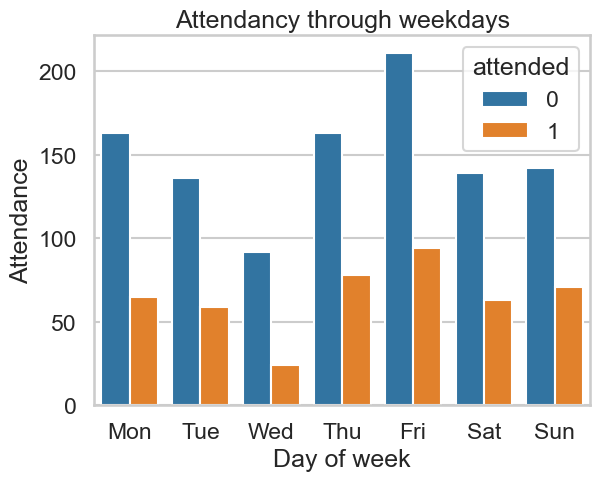

In [8]:
#Create visualization to see how many bookings attended the class
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('talk')
#a) Attendance for each day of the week 
sns.countplot(data= data, x='day_of_week', hue='attended', order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Day of week')
plt.ylabel('Attendance')
plt.title('Attendancy through weekdays')
plt.show()


**Extra**

Another different approach was made, where it is possible to see that people who weight slightly more tend to have more abscenses in everyday. This may be due because people nowadays do not feel motivated when they start doing exercise, (that would be the reason of why the are heavier). It would also be interesting to know if the customer is a male or female as well.

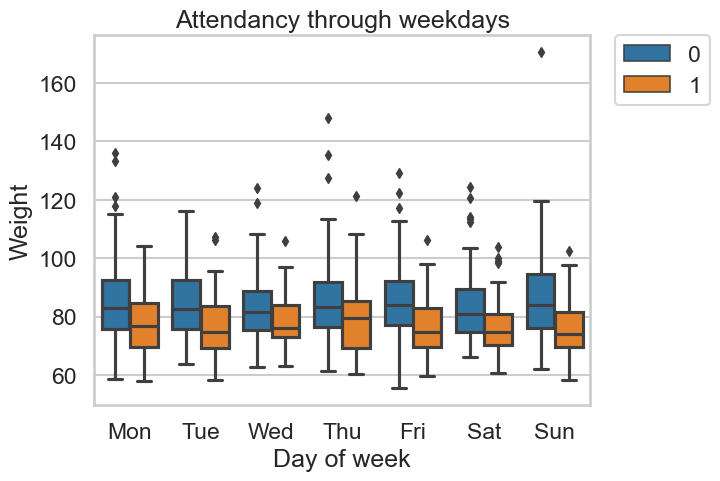

In [19]:
#a) Attendance for each day of the week in relation to the weight
sns.boxplot(data= data, x='day_of_week',y='weight', hue='attended', order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Day of week')
plt.ylabel('Weight')
plt.title('Attendancy through weekdays')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

**TIME influence on attendance**

The counplot shown below describes the number of people who came to the fitness class for both of the possible time options.
It can be concluded the following aspects:

-That more people book in AM period. (This means that there are more observations for this field)

-More people actually come in AM than PM.

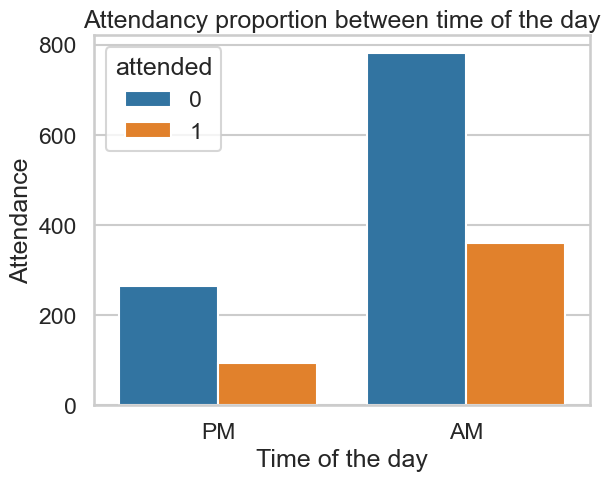

In [9]:
#b) AM vs PM
sns.countplot(data= data, x='time', hue='attended')
plt.xlabel('Time of the day')
plt.ylabel('Attendance')
plt.title('Attendancy proportion between time of the day')
plt.show()

**Categories of class influence on attendance**

In the other hand, it is also interesting to observe how the attendance varies per fitness class.

It can concluded the following aspects:

-More people book to **HIIT class** (there are more observations for this class)

-There are more than 400 absences and around 200 people came to HIIT class

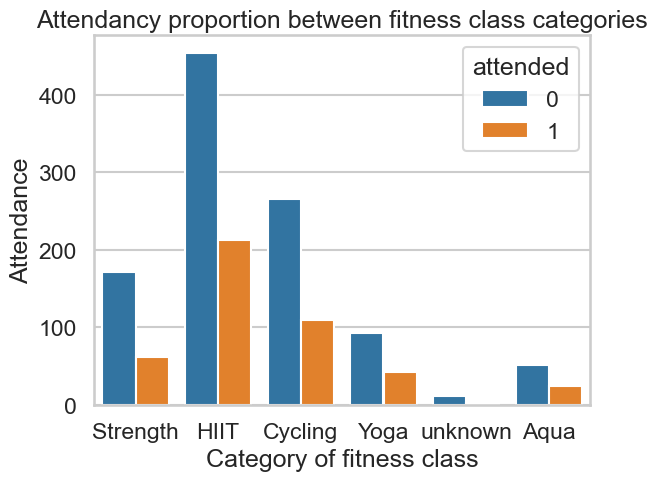

In [10]:
#c) Attendance for each category
sns.countplot(data=data, x='category', hue='attended')
plt.xlabel('Category of fitness class')
plt.ylabel('Attendance')
plt.title('Attendancy proportion between fitness class categories')
plt.show()

**Number of months as a member** data distribution

The month as member data distribution shows that most of the actual members have **between 10 to 20 months of being a member.**

Possible outliers are also visble.

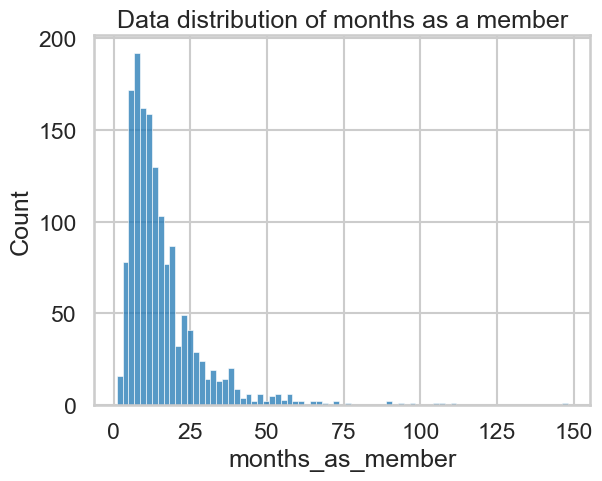

In [11]:
#Distribution of number of months as member
sns.histplot(data=data, x='months_as_member')
plt.title('Data distribution of months as a member')
plt.show()

**Correlation between attendance and number of months as a member**

According to the correlation coefficient, these two variables have a positive correlation, which means that people with 
higher months as a member tend to possible attend to the fitness gym. However, this correlation coefficient varies depending on the category of the fitness class.
This can also be seen in the previous visualization, people with higher months as member tend to have an attendance of 1.

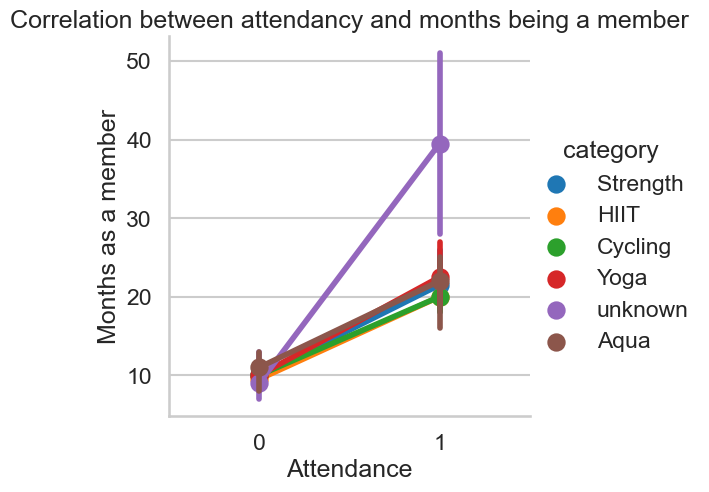

Correlation coefficient:  0.48552622327526207


In [20]:
#Is there a relationship between attendance and number of months as a member?
from numpy import median
sns.catplot(data=data, x='attended',y='months_as_member', hue='category',kind='point',estimator = median)
plt.title('Correlation between attendancy and months being a member')
plt.xlabel('Attendance')
plt.ylabel('Months as a member')
plt.show()
print('Correlation coefficient: ',data['months_as_member'].corr(data['attended']))

## Model implementation
The business wants to predict whether members will attend using the data provided. 
The best way to approach this problem is to use a **classification method** since the attendance feature is a nominal variable.

In [24]:
#Creting dummies for categorical data 
features = data.drop(columns = ['booking_id','attended'])
X = pd.get_dummies(features, columns = ['day_of_week','time','category'])  
y= data[['attended']]
print(X)

      months_as_member  weight  days_before  day_of_week_Fri  day_of_week_Mon  \
0                   17   79.56            8                0                0   
1                   10   79.01            2                0                1   
2                   16   74.53           14                0                0   
3                    5   86.12           10                1                0   
4                   15   69.29            8                0                0   
...                ...     ...          ...              ...              ...   
1495                21   79.51           10                1                0   
1496                29   89.55            2                0                1   
1497                 9   87.38            4                0                0   
1498                34   68.64           14                0                0   
1499                20   94.39            8                0                0   

      day_of_week_Sat  day_

## Selected models

As previously mentioned, this task requires classification algorithms. One possible option is the **logistic regression model** since it is commonly used to assign observations to a discrete set of classes (will attend vs will not attend).
On the other side, a **decision tree classifier** it works well with mixed data type and is less influenced by outliers. Therefore, it was chosen to be a comparison model

In [26]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

pipe_pred = pipe.predict(X_test)

#Measuring Accuracy of model

from sklearn.metrics import classification_report
print(classification_report(y_test, pipe_pred))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83       293
           1       0.78      0.38      0.51       157

    accuracy                           0.75       450
   macro avg       0.76      0.66      0.67       450
weighted avg       0.75      0.75      0.72       450



C:\Users\MacBook\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
#Decisiontree classifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred_clf = clf.predict(X_test)

print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       293
           1       0.60      0.51      0.55       157

    accuracy                           0.71       450
   macro avg       0.68      0.66      0.67       450
weighted avg       0.70      0.71      0.70       450



# Model evaluation

In order to compare both of the models, the accuracy was chosen since it is easy to read and understand. This metric focuses on
the correct predictions out of all predictions.

The accuracy of the created pipeline was 0.75 and the accuracy of the decisiontree was 0.71. This shows that scaling the data and  implementing a model performs better than only a model.

With this metric, we can conclude that the first model has a bigger chance to predict if the fitness members will attend or not the booked classes.